 # Analyse Exploratoire des Données (EDA) - Détection de Fraude
 
L'objectif de ce notebook est de réaliser une analyse approfondie de notre jeu de données `creditcard.csv`. Nous allons chercher à comprendre sa structure, identifier les caractéristiques des transactions frauduleuses et légitimes, et préparer le terrain pour les étapes de feature engineering et de modélisation.

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml


# Configuration de l'affichage pour les graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Chargement et Aperçu des Données
 
Nous commençons par charger les données à partir du chemin spécifié dans notre fichier de configuration. Cela nous permet de garder notre code propre et adaptable.

In [5]:
# Charger la configuration depuis le fichier YAML
# Le chemin est '../config' car le notebook est dans un sous-dossier de la racine
with open('../config/main_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Obtenir le chemin du jeu de données brut
raw_data_path = config['data']['raw_data_path']

# Charger les données dans un DataFrame pandas
# Le chemin complet est construit en préfixant par '../' pour remonter à la racine du projet
df = pd.read_csv(f'../{raw_data_path}')

print("Les 5 premières lignes du jeu de données :")
display(df.head())

# %%
print("\nInformations générales sur le jeu de données (types, valeurs non-nulles) :")
df.info()

# %%
print("\nStatistiques descriptives des colonnes numériques :")
display(df.describe())

Les 5 premières lignes du jeu de données :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Informations générales sur le jeu de données (types, valeurs non-nulles) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


 **Premières Observations :**
 *   Il n'y a **aucune valeur manquante**, ce qui est une excellente nouvelle.
*   Toutes les colonnes sont de type numérique (`float64` ou `int64`).
*   Les variables `V1` à `V28` semblent être centrées autour de 0, ce qui confirme qu'elles ont été standardisées après l'ACP.
 *   La variable `Amount` a une plage de valeurs très large (de 0 à plus de 25 000) avec une moyenne de 88 et une médiane de 22, ce qui indique une forte asymétrie.


## 2. Analyse du Déséquilibre des Classes
 
 C'est l'aspect le plus critique de notre jeu de données. Nous devons quantifier précisément le déséquilibre entre les transactions légitimes et frauduleuses.

Distribution des classes :
Class
0    284315
1       492
Name: count, dtype: int64

Pourcentage de fraudes : 0.173%


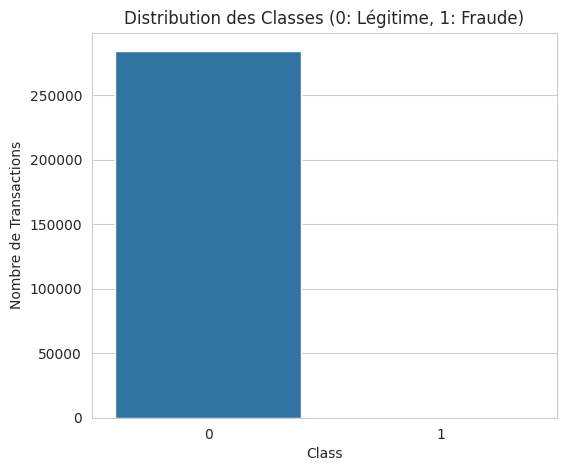

In [6]:
# Compter le nombre d'occurrences pour chaque classe
class_counts = df['Class'].value_counts()
print("Distribution des classes :")
print(class_counts)
print(f"\nPourcentage de fraudes : {class_counts[1] / len(df) * 100:.3f}%")

# Visualisation de la distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Class', data=df)
plt.title('Distribution des Classes (0: Légitime, 1: Fraude)')
plt.ylabel('Nombre de Transactions')
plt.show()

 **Conclusion sur le Déséquilibre :**
 *   Le jeu de données est **extrêmement déséquilibré**. Les fraudes ne représentent que **0.173%** de l'ensemble des transactions.
 *   Cela confirme que l'**accuracy sera une métrique totalement inutile**. Nous devrons nous concentrer sur le Rappel, la Précision, le F1-Score et l'AUC-PR.
 *   Des techniques comme **SMOTE** seront nécessaires lors de l'entraînement pour forcer le modèle à apprendre les caractéristiques de la classe minoritaire.

 ## 3. Analyse de la Variable 'Amount'
 
 Analysons comment le montant des transactions diffère entre les classes légitimes et frauduleuses.

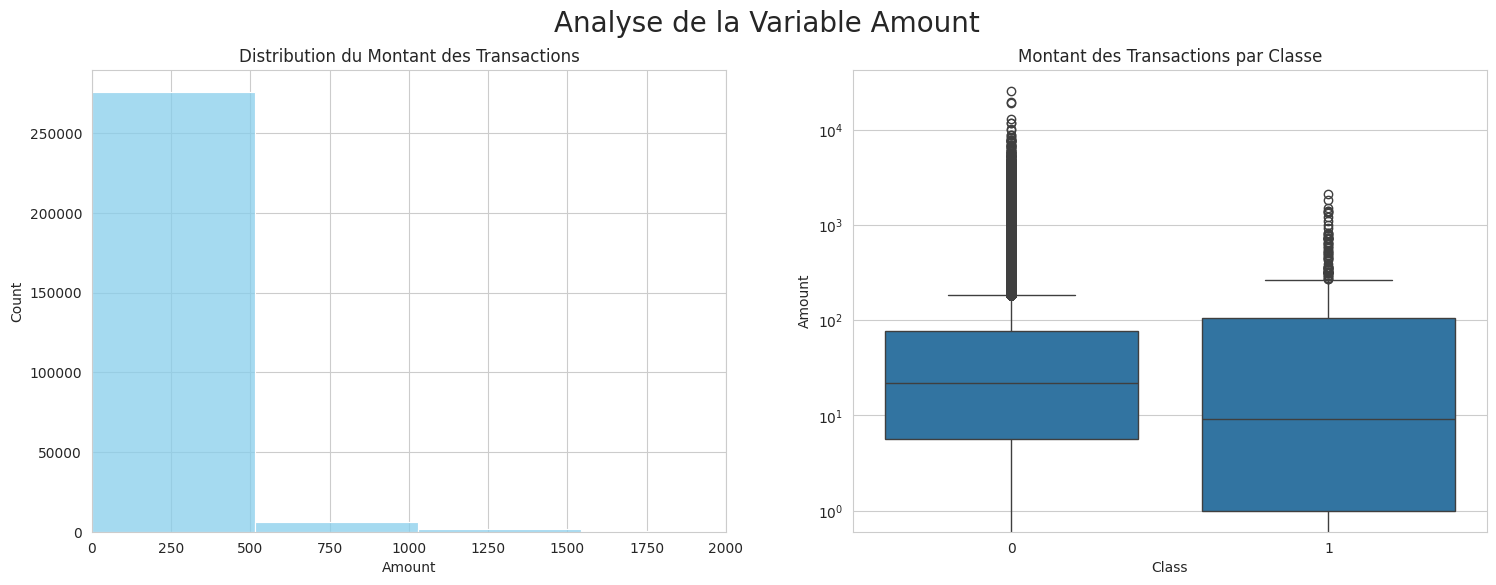


Statistiques sur le montant pour chaque classe :


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Histogramme du montant
sns.histplot(df['Amount'], bins=50, ax=ax1, color='skyblue')
ax1.set_title('Distribution du Montant des Transactions')
ax1.set_xlim(0, 2000) # On limite pour mieux voir la majorité des transactions

# Boxplot du montant par classe
sns.boxplot(x='Class', y='Amount', data=df, ax=ax2)
ax2.set_title('Montant des Transactions par Classe')
ax2.set_yscale('log') # Echelle logarithmique pour mieux voir les boîtes à moustaches
plt.suptitle('Analyse de la Variable Amount', size=20)
plt.show()

# %%
print("\nStatistiques sur le montant pour chaque classe :")
df.groupby('Class')['Amount'].describe()


 **Analyse de `Amount` :**
 *   La distribution est très asymétrique. La plupart des transactions sont de faible montant.
 *   Le boxplot en échelle logarithmique montre que **la médiane des montants frauduleux est plus élevée** que celle des transactions légitimes.
 *   Cependant, il existe de nombreuses fraudes de faible montant, ce qui signifie que le montant seul n'est pas un critère absolu.
 *   **Action à prendre :** Nous devrons **normaliser** la colonne `Amount` (par exemple avec un `StandardScaler`) et potentiellement créer une version logarithmique (`Amount_log`) pour le feature engineering.

 ## 4. Analyse de la Variable 'Time'
 
 Le temps peut révéler des patterns, comme des fraudes se produisant plus fréquemment la nuit.

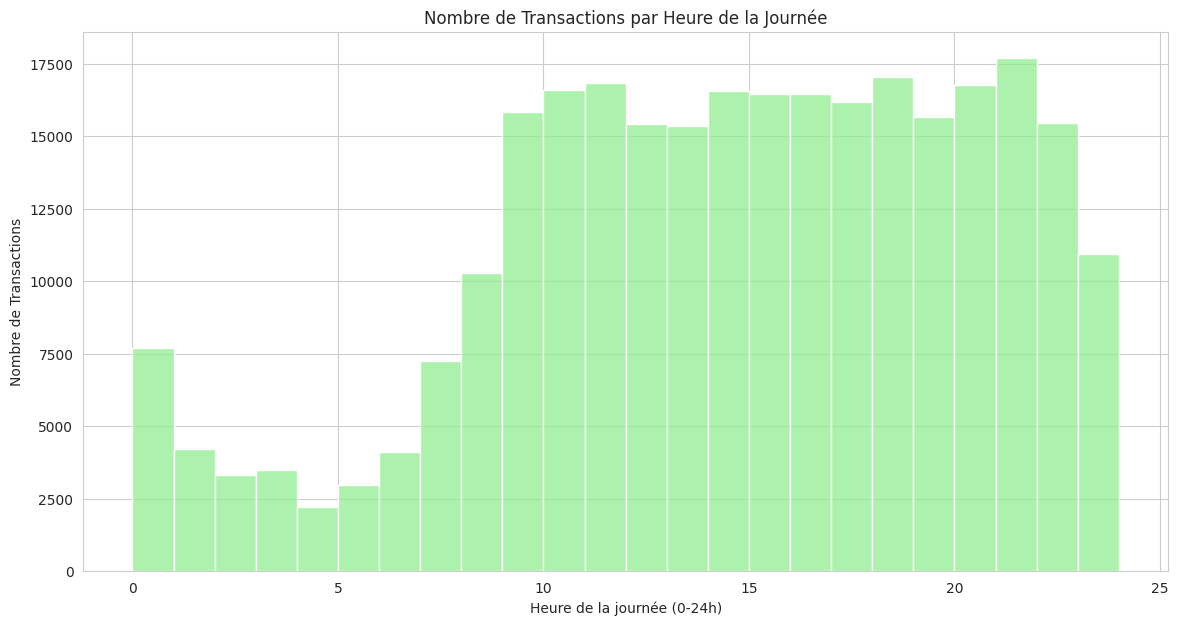

In [8]:
# Créons une feature 'hour_of_day' pour l'analyse
seconds_in_day = 24 * 60 * 60
df['hour_of_day'] = (df['Time'] % seconds_in_day) / 3600

# Visualisation des transactions par heure
plt.figure(figsize=(14, 7))
sns.histplot(df['hour_of_day'], bins=24, color='lightgreen')
plt.title('Nombre de Transactions par Heure de la Journée')
plt.xlabel('Heure de la journée (0-24h)')
plt.ylabel('Nombre de Transactions')
plt.show()

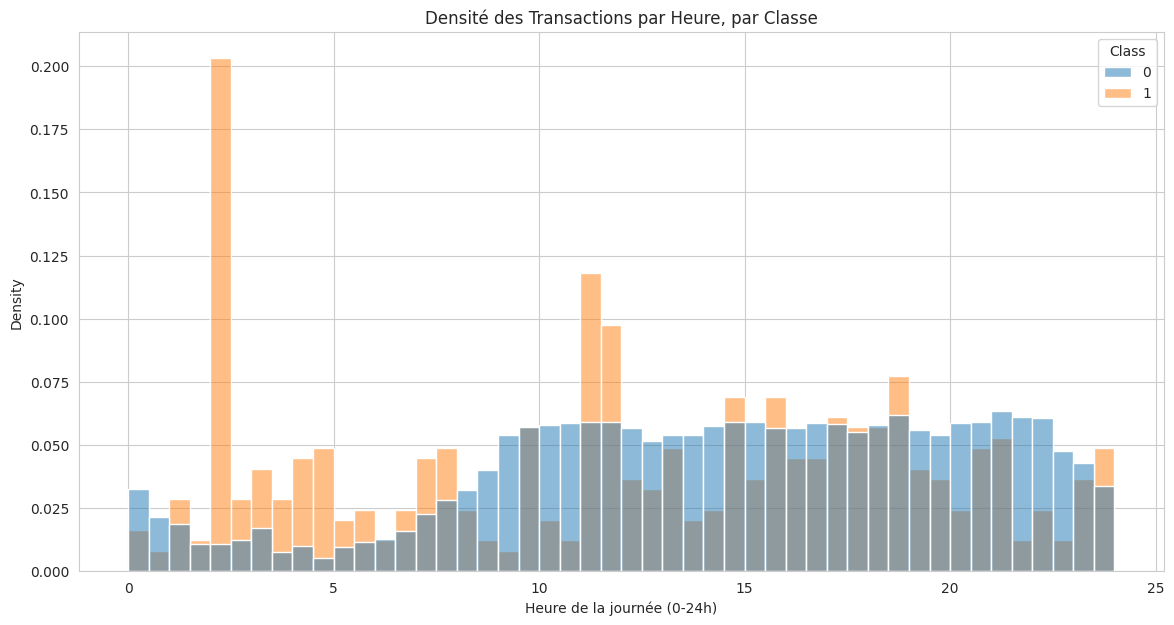

In [9]:
# Comparaison des distributions temporelles entre les classes
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='hour_of_day', hue='Class', bins=48, stat='density', common_norm=False)
plt.title('Densité des Transactions par Heure, par Classe')
plt.xlabel('Heure de la journée (0-24h)')
plt.show()

 **Analyse de `Time` :**
 *   Le premier graphique montre clairement un **cycle jour/nuit** pour l'ensemble des transactions, avec des pics d'activité pendant la journée et un creux la nuit.
 *   Le second graphique est très révélateur : la distribution des transactions légitimes (en bleu) suit ce cycle. En revanche, la distribution des fraudes (en orange) est beaucoup plus **uniforme**.
 *   **Conclusion :** Proportionnellement, les fraudes sont plus fréquentes pendant les heures creuses (nuit). La feature `hour_of_day` sera donc **très importante** pour notre modèle.


 ## 5. Analyse des Composantes Principales (V1-V28)
 
 Bien qu'anonymes, ces variables contiennent l'essentiel de l'information. Voyons si certaines d'entre elles ont des distributions visiblement différentes entre les fraudes et les transactions légitimes.

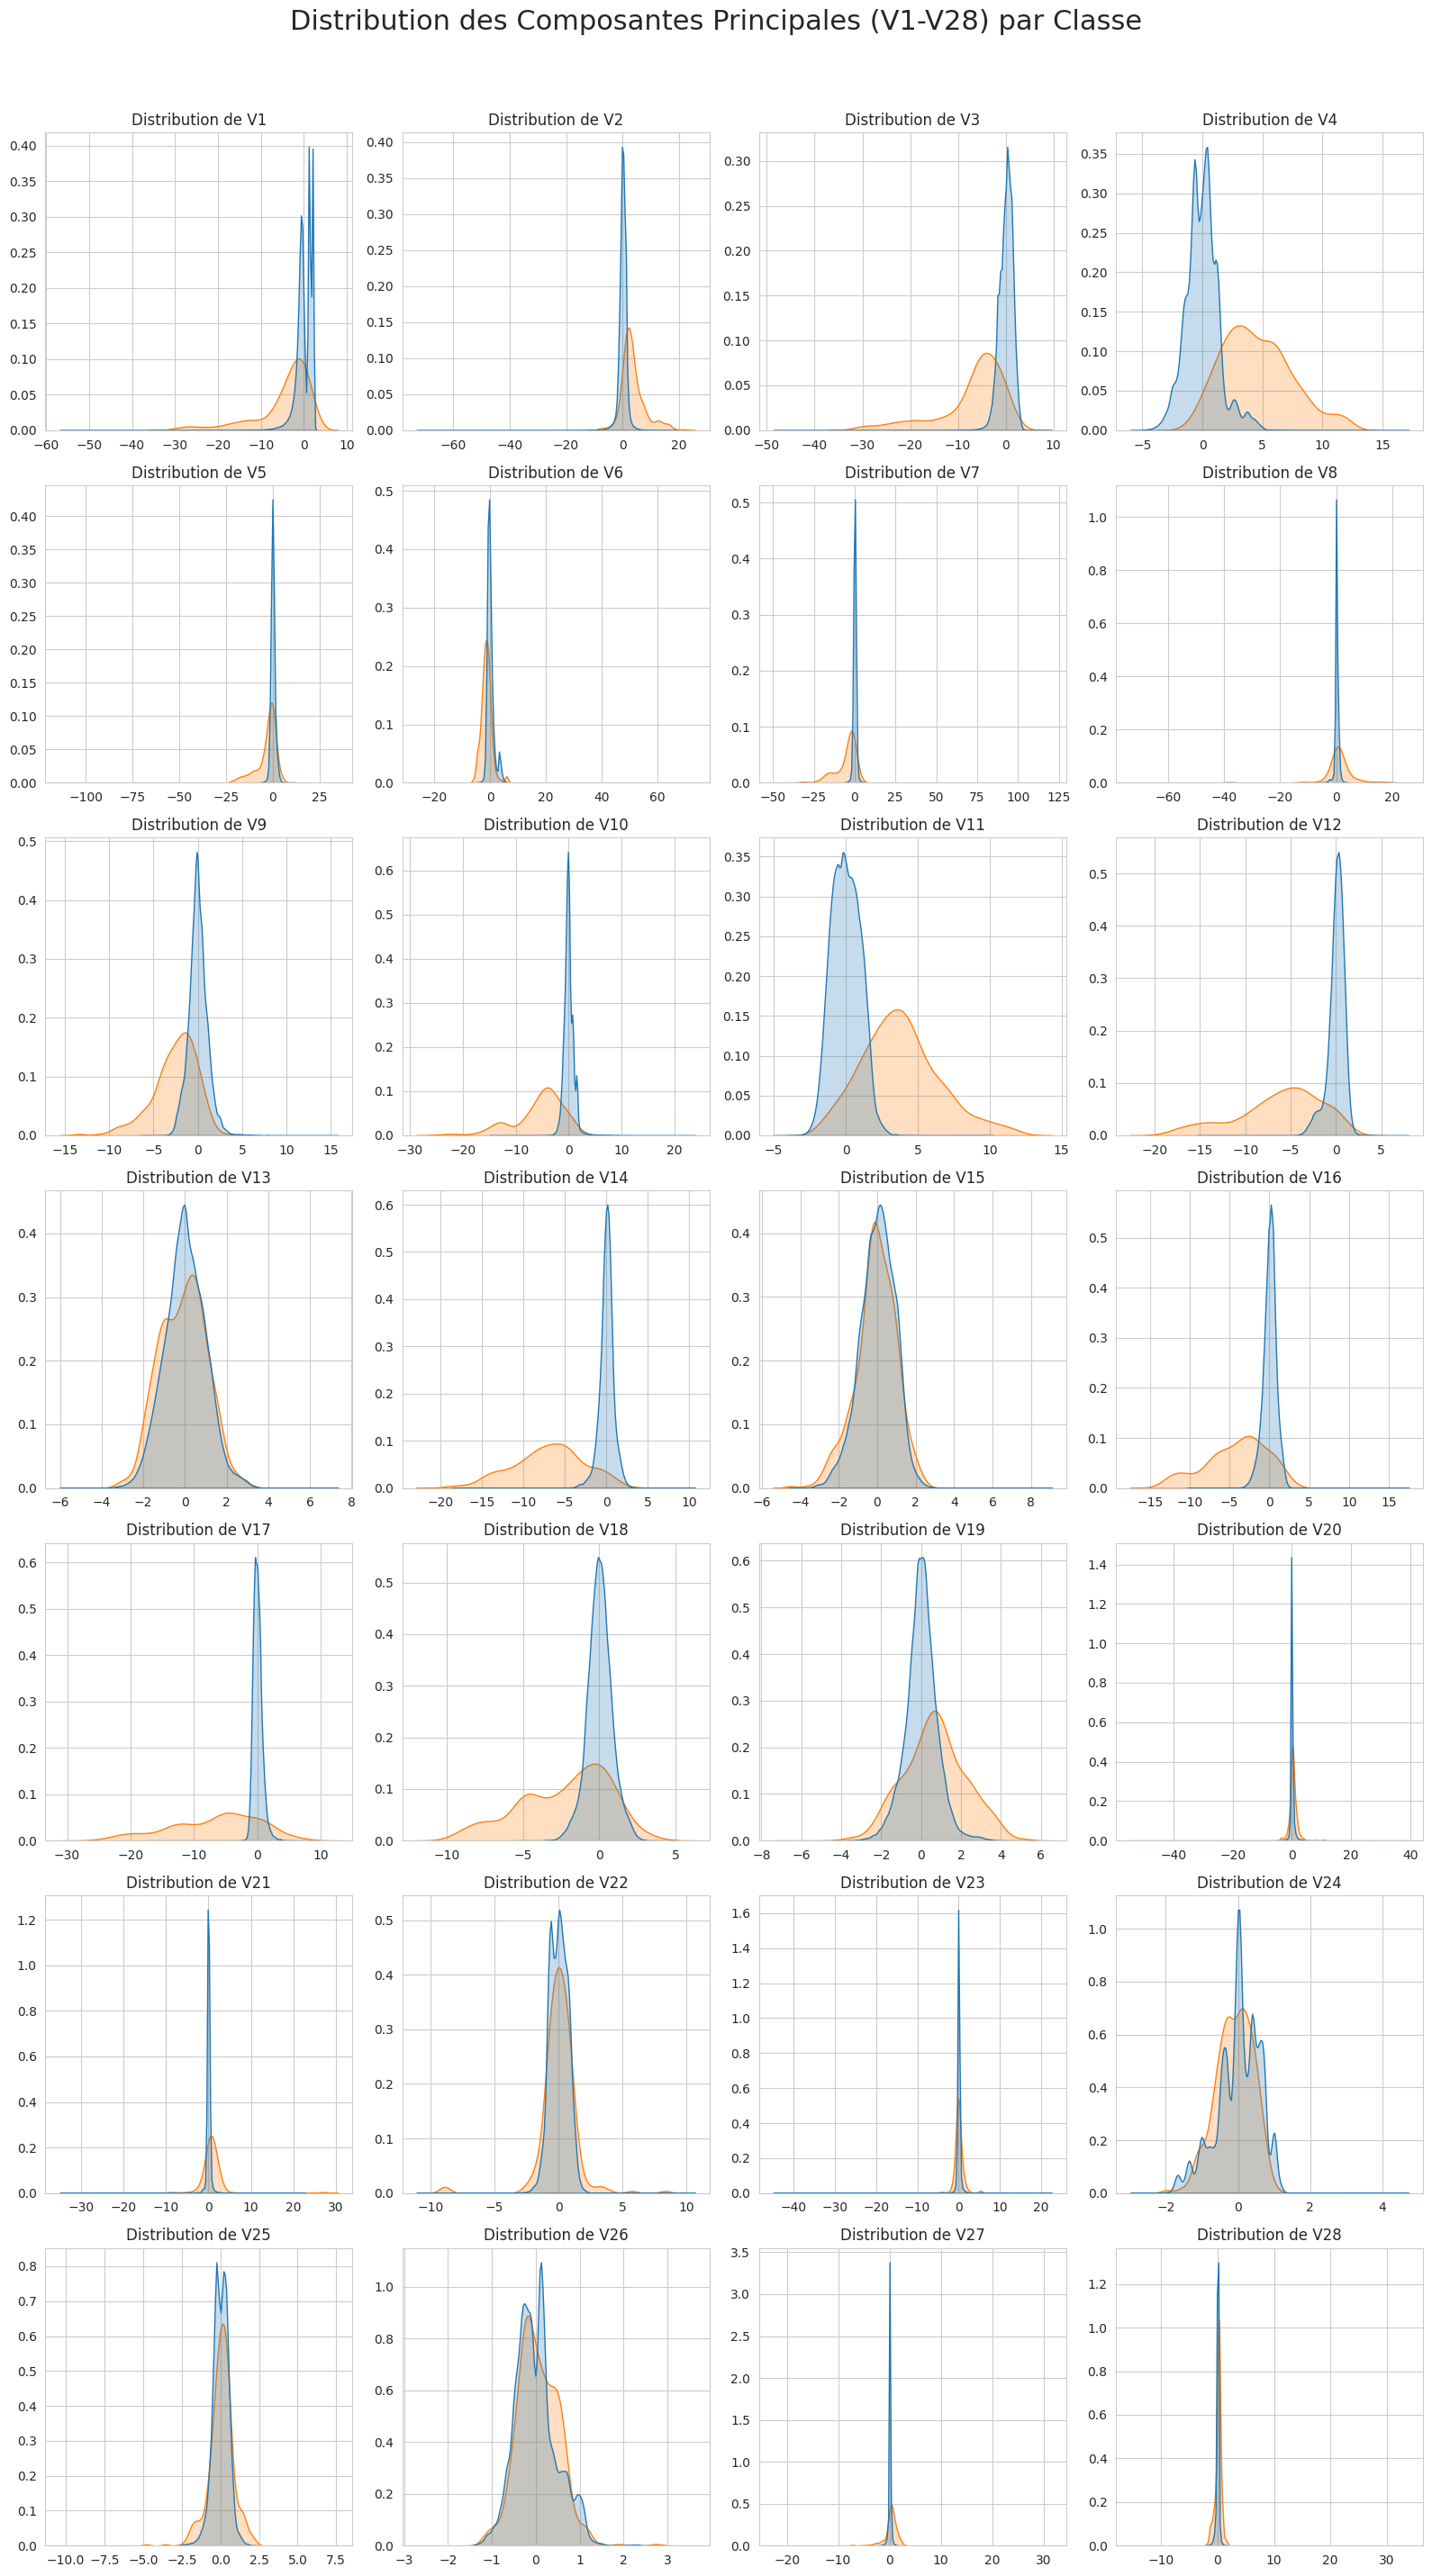

In [10]:
v_features = [f'V{i}' for i in range(1, 29)]

plt.figure(figsize=(16, 28))
plt.suptitle('Distribution des Composantes Principales (V1-V28) par Classe', size=22, y=1.02)

for i, feature in enumerate(v_features):
    plt.subplot(7, 4, i + 1)
    sns.kdeplot(data=df, x=feature, hue='Class', fill=True, common_norm=False)
    plt.title(f'Distribution de {feature}')
    plt.legend([],[], frameon=False) # Cacher les légendes individuelles pour plus de clarté
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

**Analyse des variables `V` :**
 *   C'est ici que se trouve l'information la plus discriminante.
 *   Pour plusieurs variables, les distributions sont **radicalement différentes** entre la classe 0 (bleu) et la classe 1 (orange).
 *   **Exemples frappants :** `V3`, `V4`, `V10`, `V11`, `V12`, `V14`, `V16`, `V17`. Pour ces variables, une valeur dans une certaine plage est un très fort indicateur de fraude.
 *   D'autres variables comme `V20` ou `V23` ont des distributions quasi identiques et seront probablement moins utiles pour le modèle.

 ## 6. Matrice de Corrélation
 
 Vérifions les corrélations entre toutes les variables. On s'attend à ce que les variables V soient décorrelées entre elles, mais elles peuvent avoir une corrélation avec `Time`, `Amount` ou `Class`.

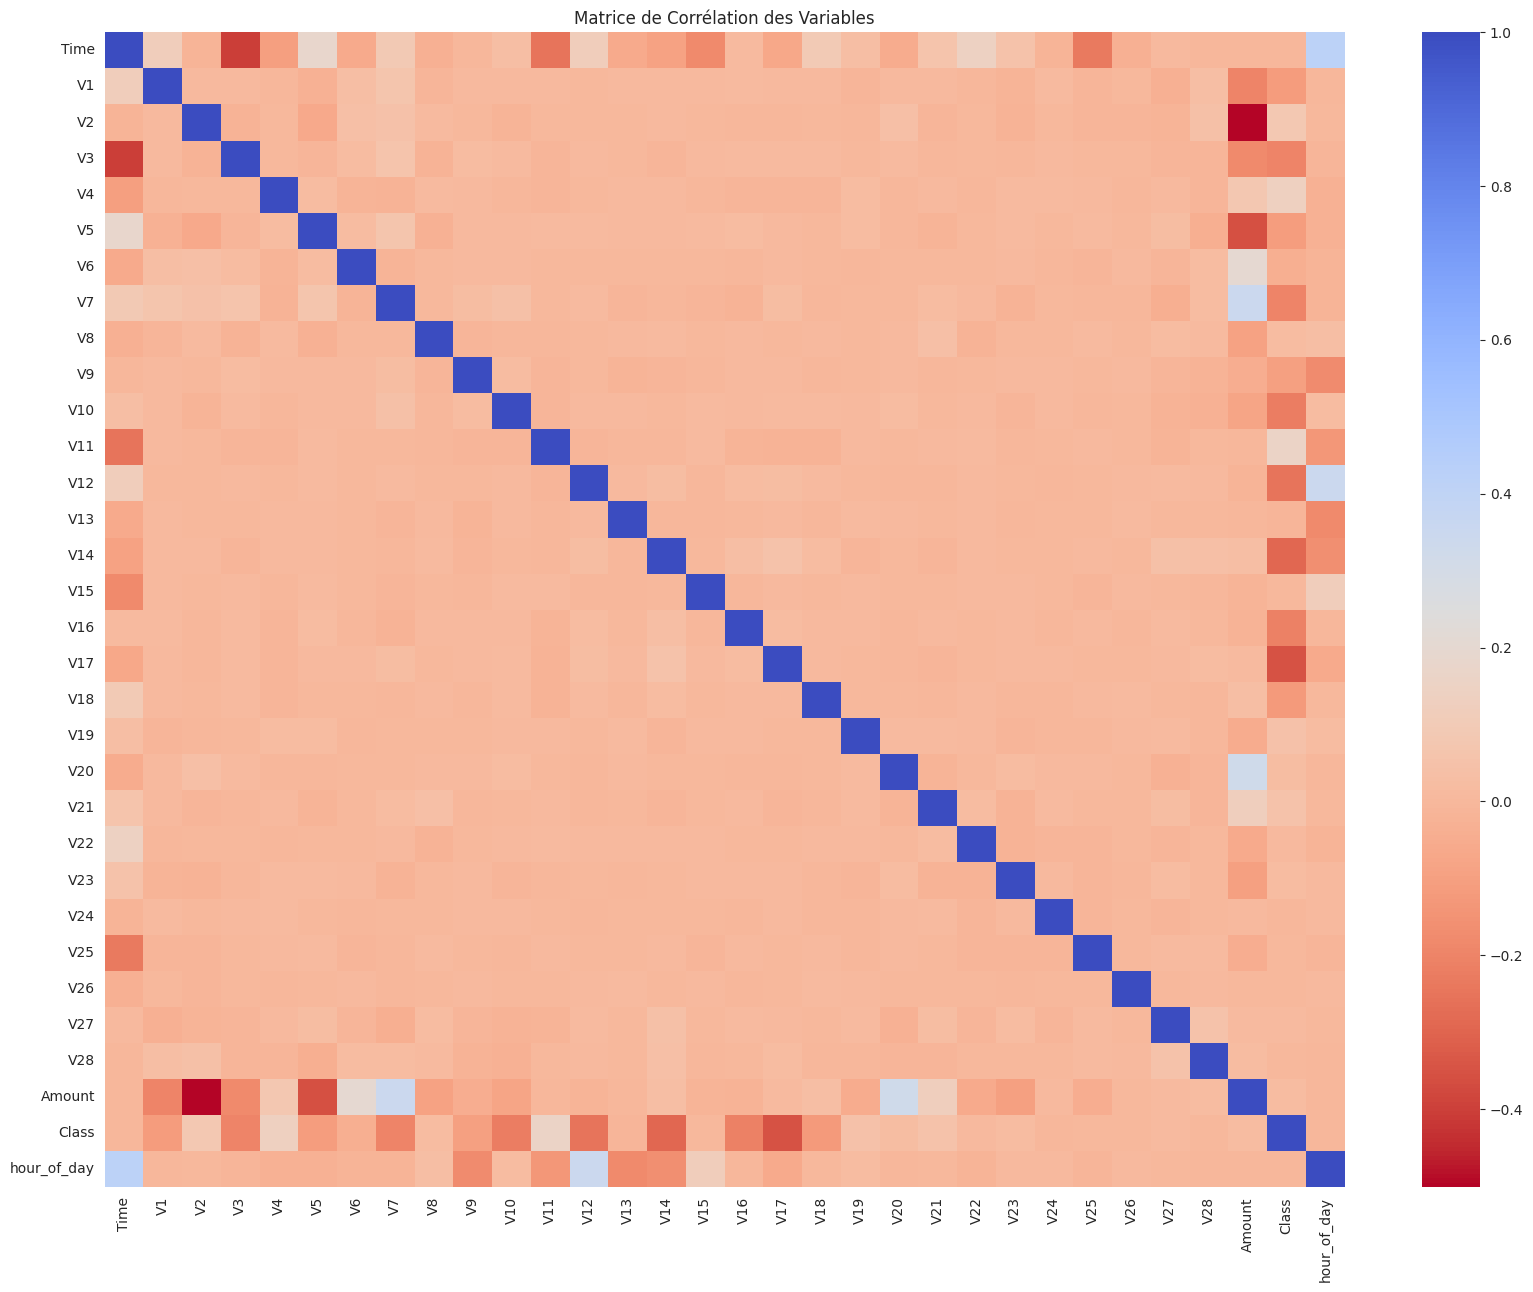

In [11]:
# On utilise une sous-partie du dataframe pour la performance, car le calcul est lourd
sample_df = df.sample(frac=0.1, random_state=42)
corr = sample_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap='coolwarm_r', annot=False, fmt='.2f') # annot=False pour la lisibilité
plt.title('Matrice de Corrélation des Variables')
plt.show()

 **Analyse de la Corrélation :**
 *   Comme prévu, les variables `V1` à `V28` ne montrent **aucune corrélation significative entre elles**. C'est une propriété de l'Analyse en Composantes Principales. C'est un avantage pour les modèles comme la Régression Logistique.
 *   On observe de faibles corrélations entre `Amount` et certaines variables V (ex: `V20`, `V7`), et entre `Time` et `V3`.
 *   Plus important, la variable `Class` a des corrélations (négatives ou positives) avec plusieurs variables `V`, ce qui confirme leur pouvoir prédictif.

 ## 7. Conclusions de l'EDA et Prochaines Étapes
 
 Cette analyse exploratoire nous a permis de tirer des conclusions essentielles pour la suite du projet :
 
 1.  **Problème Principal :** Le déséquilibre extrême des classes est le défi majeur. Nous devrons utiliser des métriques adaptées (AUC-PR, Rappel) et des techniques de rééchantillonnage (SMOTE).
 
 2.  **Feature Engineering Nécessaire :**
     *   **`Amount` :** Doit être normalisée (ex: `StandardScaler`). La transformation logarithmique (`Amount_log`) est une excellente candidate pour une nouvelle feature.
     *   **`Time` :** La variable brute est peu utile. La transformer en `hour_of_day` est **crucial** pour capturer les patterns temporels.
 
 3.  **Pouvoir Prédictif :** L'information clé pour la détection est contenue dans les variables `V`. Les modèles basés sur les arbres (Random Forest, XGBoost) seront probablement très performants car ils peuvent trouver des règles complexes sur ces variables.
 
 **Prochaines étapes :**
 *   Créer un script de prétraitement (`src/features/build_features.py`) qui implémentera le feature engineering identifié.
 *   Créer un pipeline pour préparer les données d'entraînement et de test.
 *   Prototyper des modèles dans un nouveau notebook (`02_model_prototyping.ipynb`).